### Decision Tree Regressor model

#### on convoluted rgb data

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from tensorflow import keras
import tensorflow as tf
from sklearn.linear_model import RidgeCV
import random
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
import seaborn as sns
#sess=tf.compat.v1.InteractiveSession()
#conda list | grep tensorflow

In [2]:
# preprocess: data import, shuffle, switch axes, flattening , convolution. detailed in notebk 'rgb_data_load_mod.ipynb'.

b = np.load('/Users/anirudhputrevu/Downloads/depth_training_data.npz')
data_rgb = b['rgb_images']                # RGB DATA 
data_depth = b['depth_maps']              # DEPTH DATA 
data_rgb = data_rgb/255
data_depth = data_depth - data_depth.min()
# switch axes for plotting
data_rgb = data_rgb.transpose(0,2,3,1)
data_depth = data_depth.transpose(0,2,3,1)

# shuffle images
random.seed(400)
random.shuffle(data_depth)     # inplace method
random.seed(400)
random.shuffle(data_rgb)


data_rgb, data_depth = data_rgb[:1500], data_depth[:1500]


# flatten
X = data_rgb.reshape(data_rgb.shape[0],27648)        
Y = data_depth.reshape(data_depth.shape[0],9216)
#conv
input_shape = data_rgb.shape
x = data_rgb  # no padding, strides default
y = tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape=input_shape[1:])(x)
x_f = tf.keras.layers.MaxPool2D()(y)
x_f.shape
y1 = tf.keras.layers.Conv2D(96, 3, activation='relu')(x_f)
y1.shape
x_ff = tf.keras.layers.MaxPool2D()(y1)
x_ff.shape
y11 = tf.keras.layers.Conv2D(96, 3, activation='relu')(x_ff)
y11.shape
x_fff = tf.keras.layers.MaxPool2D()(y11)
x_fff.shape
x_fff = tf.keras.layers.GlobalAveragePooling2D()(x_fff) 

xconv = x_fff.numpy()

2022-01-03 15:20:56.424286: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
xconv.shape # selected 96 features from 96*96*3

(1500, 96)

#### splitting test train 

In [4]:
x_train, x_test, y_train, y_test = train_test_split(xconv, Y, test_size= 0.20, random_state = 0)

#### decision tree : hyper params (maxdepth =8,  minsamples = 50)

In [5]:
tree=DecisionTreeRegressor(min_samples_leaf=50,max_depth=8)

treeModel=tree.fit(x_train, y_train)

y_pred=treeModel.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print(f"model mse is {mse :3.2}")
print("Maximum Depth of the the tree is ", treeModel.tree_.max_depth)
print("Number of nodes of the tree is ",treeModel.tree_.node_count)
print("Number of leaves (AKA number of regions) is ", treeModel.tree_.n_leaves)

model mse is 0.0063
Maximum Depth of the the tree is  8
Number of nodes of the tree is  37
Number of leaves (AKA number of regions) is  19


#### decision tree : hyper params (maxdepth =16,  minsamples = 100)

In [6]:
tree=DecisionTreeRegressor(min_samples_leaf=100,max_depth=16)

treeModel=tree.fit(x_train, y_train)

y_pred=treeModel.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print(f"model mse is {mse :3.2}")
print("Maximum Depth of the the tree is ", treeModel.tree_.max_depth)
print("Number of nodes of the tree is ",treeModel.tree_.node_count)
print("Number of leaves (AKA number of regions) is ", treeModel.tree_.n_leaves)

model mse is 0.0071
Maximum Depth of the the tree is  6
Number of nodes of the tree is  17
Number of leaves (AKA number of regions) is  9


#### decision tree : hyper params (maxdepth = 5 ,  minsamples = 25)

In [7]:
tree=DecisionTreeRegressor(min_samples_leaf=25,max_depth=5)

treeModel=tree.fit(x_train, y_train)

y_pred=treeModel.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print(f"model mse is {mse :3.2}")
#print(export_text(treeModel))
print("Maximum Depth of the the tree is ", treeModel.tree_.max_depth)
print("Number of nodes of the tree is ",treeModel.tree_.node_count)
print("Number of leaves (AKA number of regions) is ", treeModel.tree_.n_leaves)

model mse is 0.0055
Maximum Depth of the the tree is  5
Number of nodes of the tree is  29
Number of leaves (AKA number of regions) is  15


#### decision tree : hyper params (maxdepth = 5 ,  minsamples = 15)

In [8]:
tree=DecisionTreeRegressor(min_samples_leaf=15,max_depth=5)

treeModel=tree.fit(x_train, y_train)

y_pred=treeModel.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print(f"model mse is {mse :3.2}")
print("Maximum Depth of the the tree is ", treeModel.tree_.max_depth)
print("Number of nodes of the tree is ",treeModel.tree_.node_count)
print("Number of leaves (AKA number of regions) is ", treeModel.tree_.n_leaves)

model mse is 0.0056
Maximum Depth of the the tree is  5
Number of nodes of the tree is  37
Number of leaves (AKA number of regions) is  19


#### decision tree : hyper params (maxdepth = 5 ,  minsamples = 10) - plotting tree 

model mse is 0.0052
Maximum Depth of the the tree is  5
Number of nodes of the tree is  47
Number of leaves (AKA number of regions) is  24


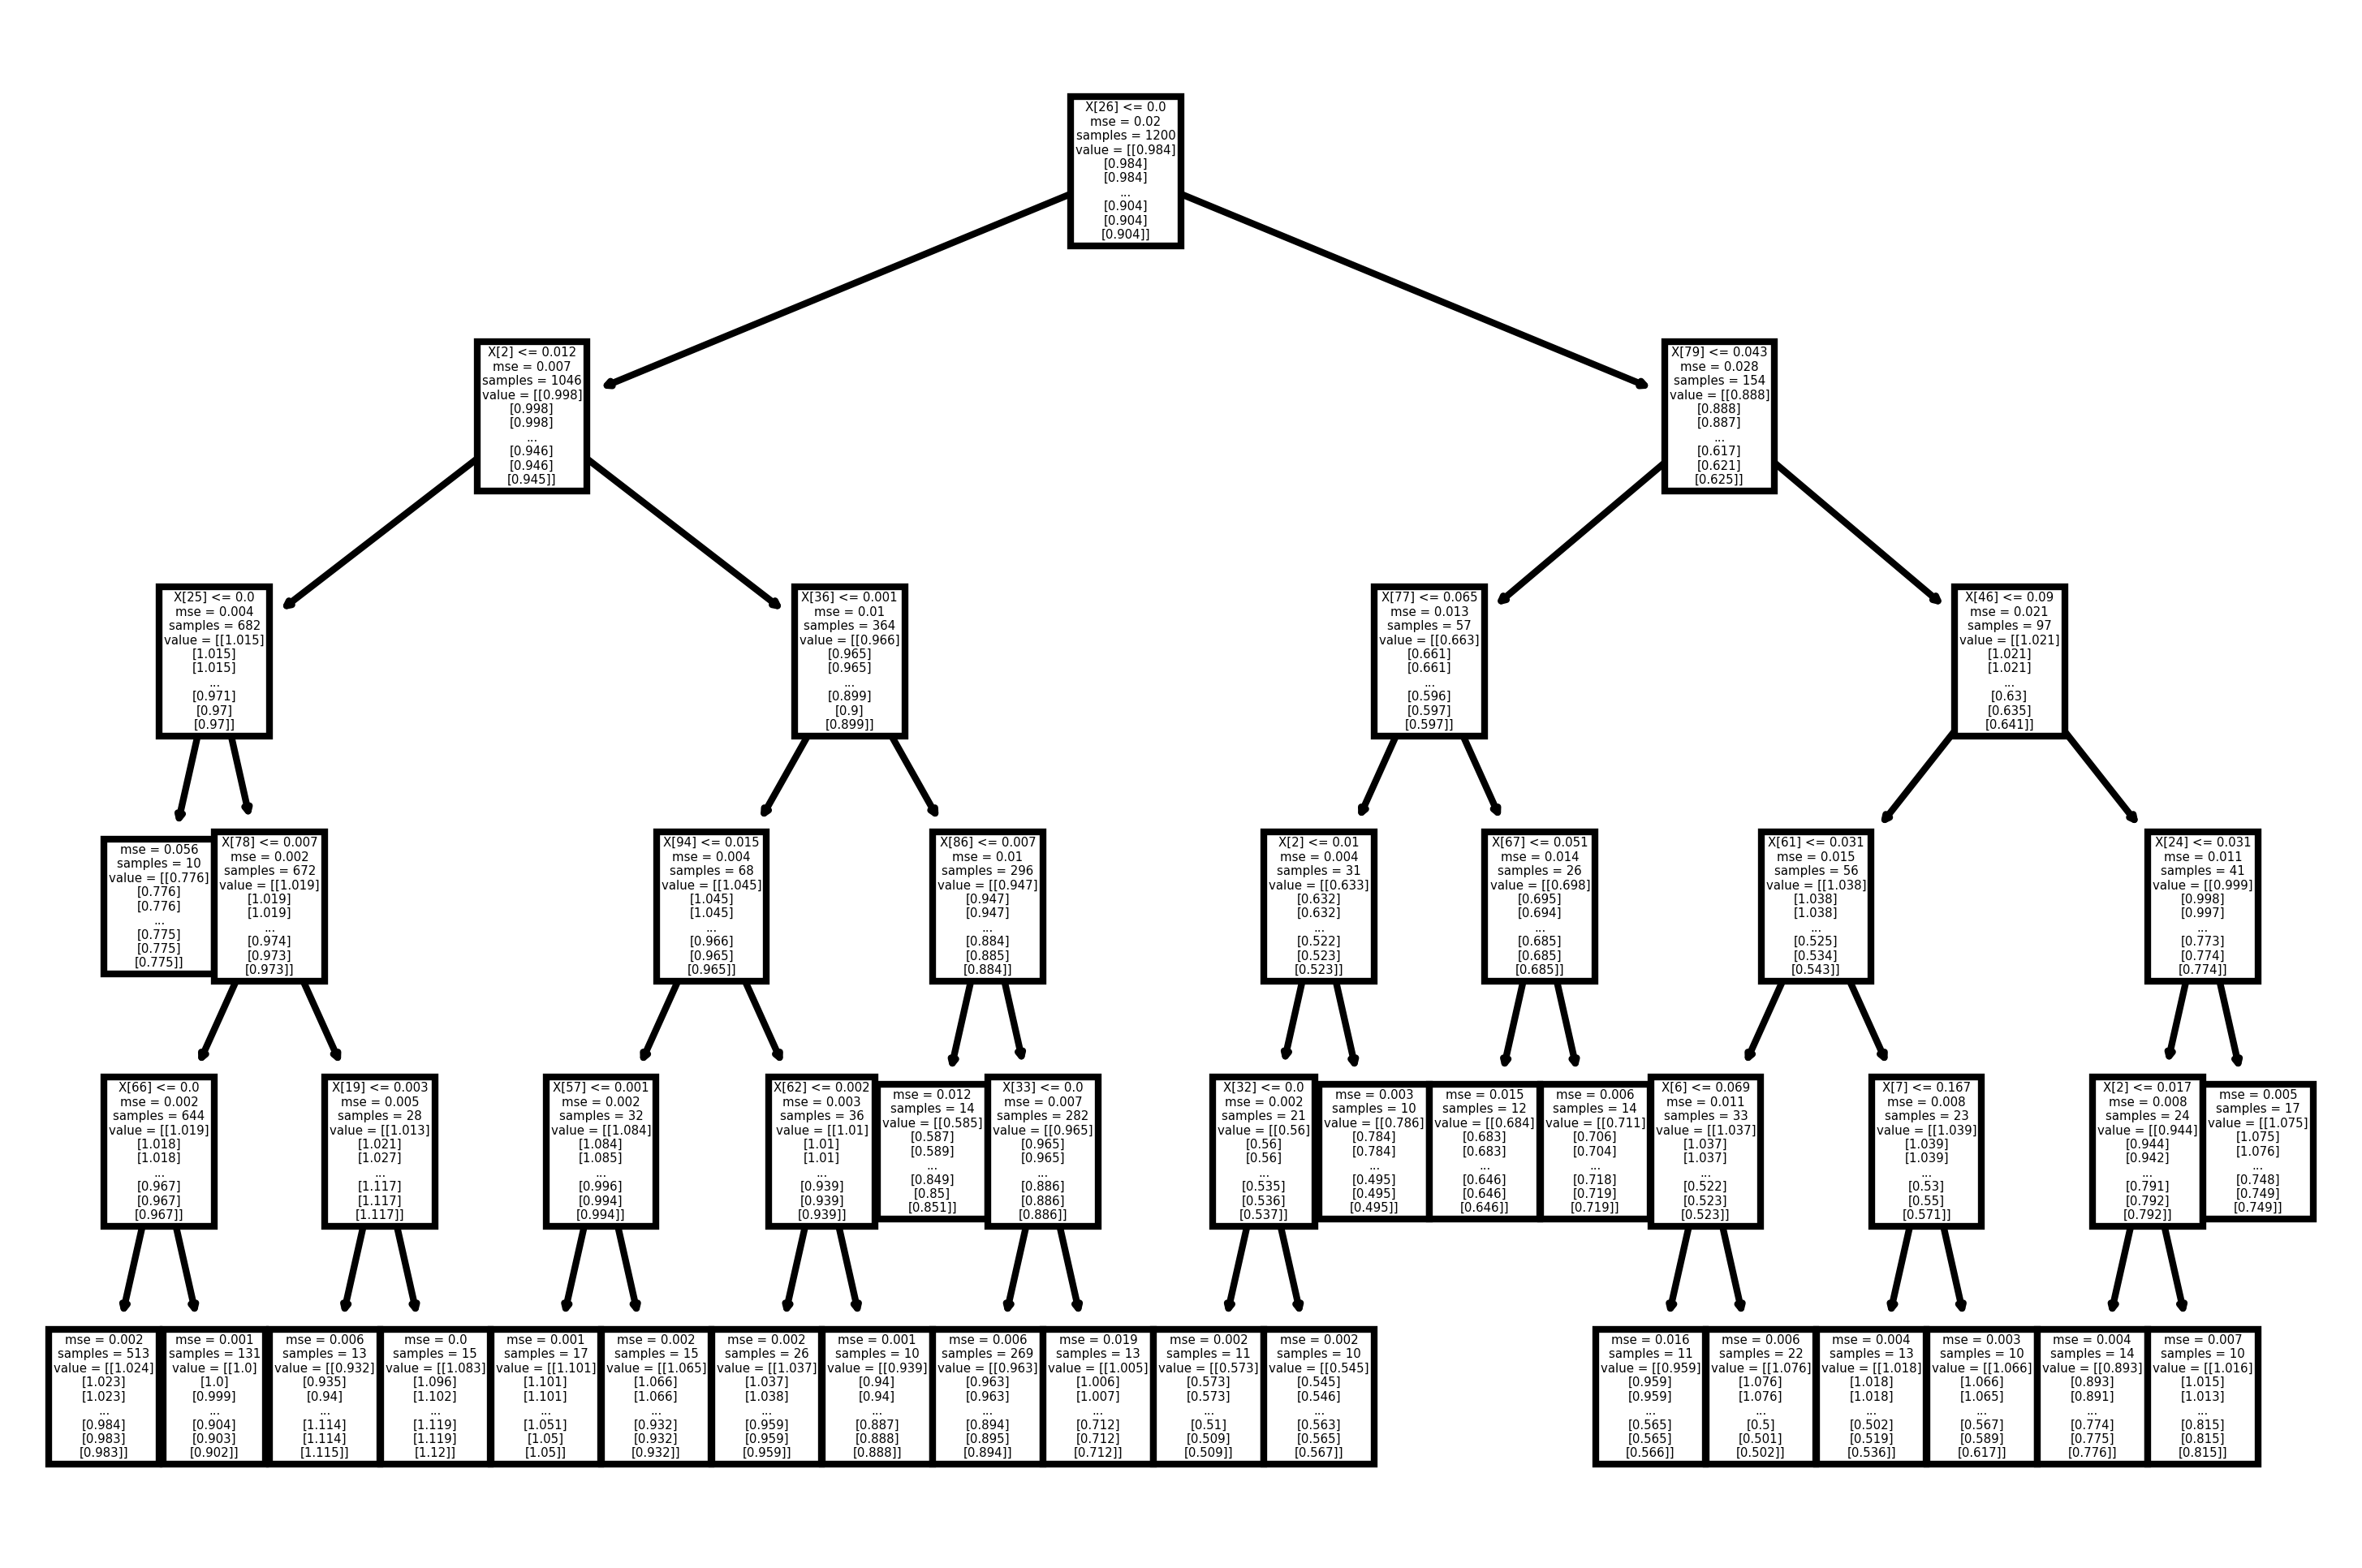

In [9]:
tree=DecisionTreeRegressor(min_samples_leaf=10,max_depth=5)

treeModel=tree.fit(x_train, y_train)

y_pred=treeModel.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print(f"model mse is {mse :3.2}")
print("Maximum Depth of the the tree is ", treeModel.tree_.max_depth)
print("Number of nodes of the tree is ",treeModel.tree_.node_count)
print("Number of leaves (AKA number of regions) is ", treeModel.tree_.n_leaves)
fig=plt.figure(dpi=600)
sub=fig.add_subplot(1,1,1)
plot_tree(treeModel)
plt.show()

#### decision tree : hyper params (maxdepth = 4 ,  minsamples = 8)

In [10]:
tree=DecisionTreeRegressor(min_samples_leaf=8,max_depth=4)

treeModel=tree.fit(x_train, y_train)

y_pred=treeModel.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print(f"model mse is {mse :3.2}")
print("Maximum Depth of the the tree is ", treeModel.tree_.max_depth)
print("Number of nodes of the tree is ",treeModel.tree_.node_count)
print("Number of leaves (AKA number of regions) is ", treeModel.tree_.n_leaves)

model mse is 0.0059
Maximum Depth of the the tree is  4
Number of nodes of the tree is  29
Number of leaves (AKA number of regions) is  15


#### reducing min samples, and increasing max tree depth 
#### decision tree : hyper params (maxdepth = 5 ,  minsamples = 5) 

model mse is 0.0057
Maximum Depth of the the tree is  5
Number of nodes of the tree is  47
Number of leaves (AKA number of regions) is  24


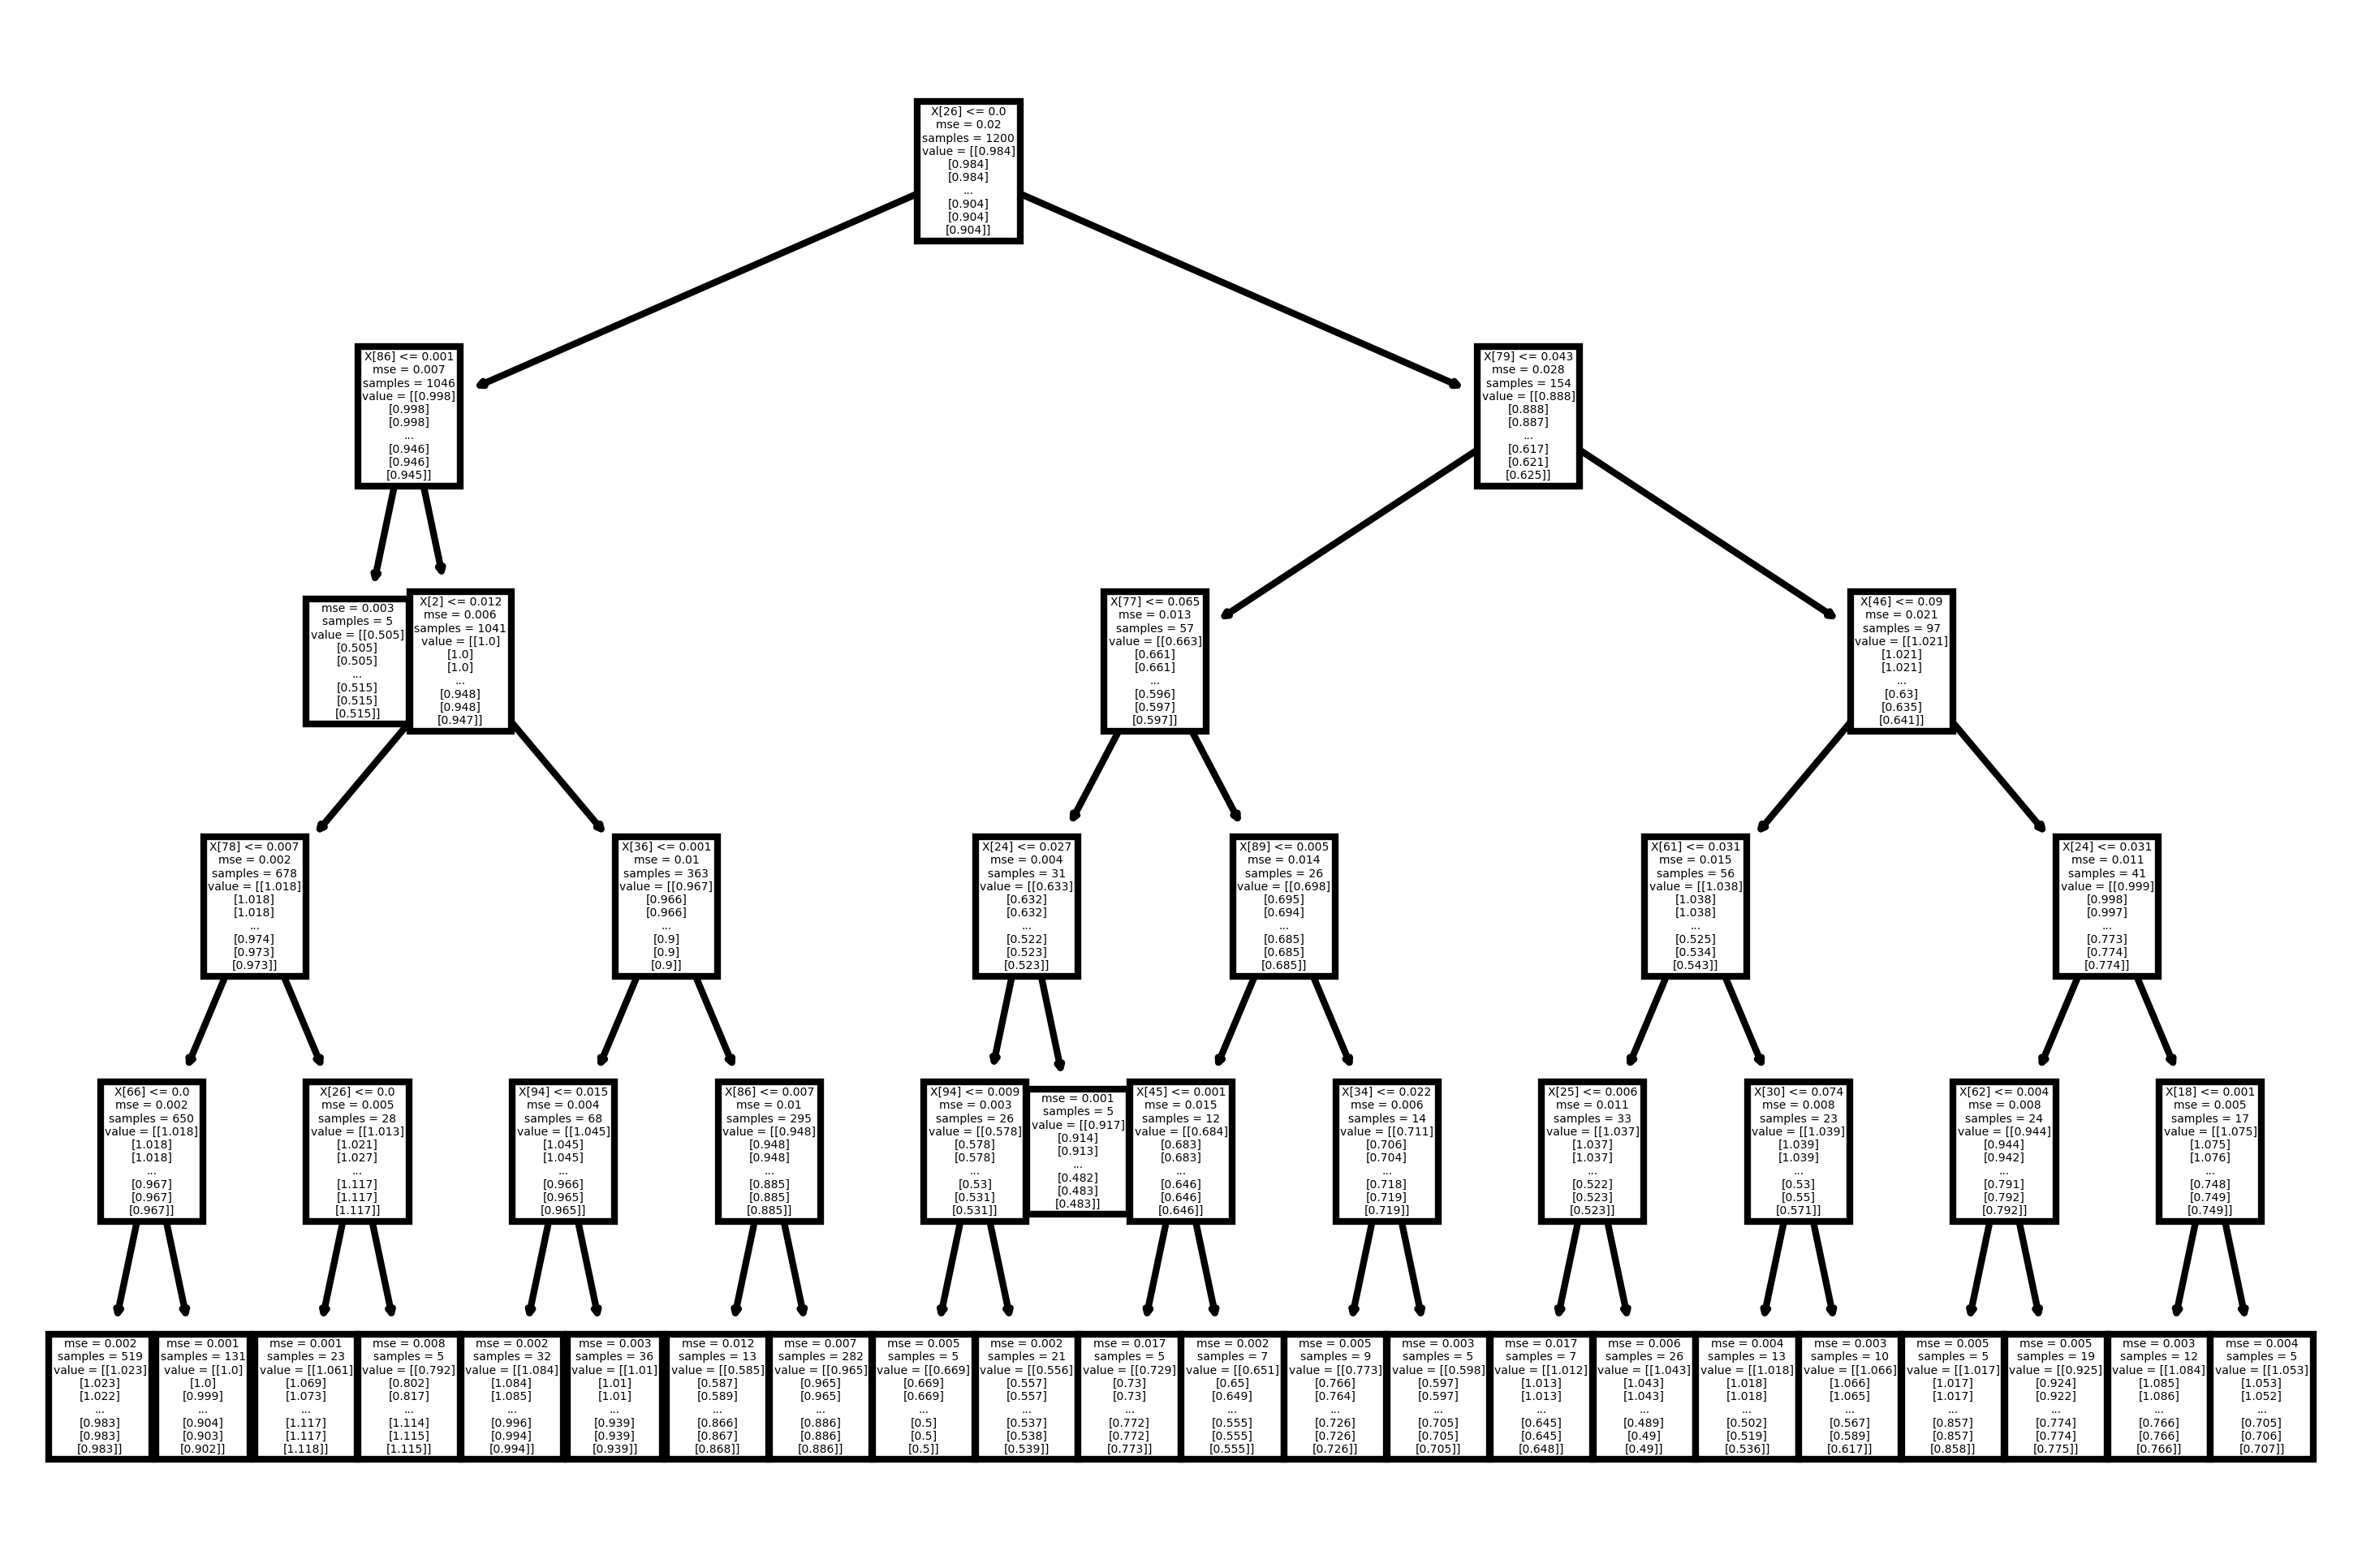

In [11]:
tree=DecisionTreeRegressor(min_samples_leaf=5,max_depth=5)

treeModel=tree.fit(x_train, y_train)

y_pred=treeModel.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print(f"model mse is {mse :3.2}")
print("Maximum Depth of the the tree is ", treeModel.tree_.max_depth)
print("Number of nodes of the tree is ",treeModel.tree_.node_count)
print("Number of leaves (AKA number of regions) is ", treeModel.tree_.n_leaves)
fig=plt.figure(dpi=600)
sub=fig.add_subplot(1,1,1)
plot_tree(treeModel)
plt.show()

#### decision tree : hyper params (maxdepth = 10,  minsamples = 5) 

model mse is 0.0038
Maximum Depth of the the tree is  10
Number of nodes of the tree is  175
Number of leaves (AKA number of regions) is  88


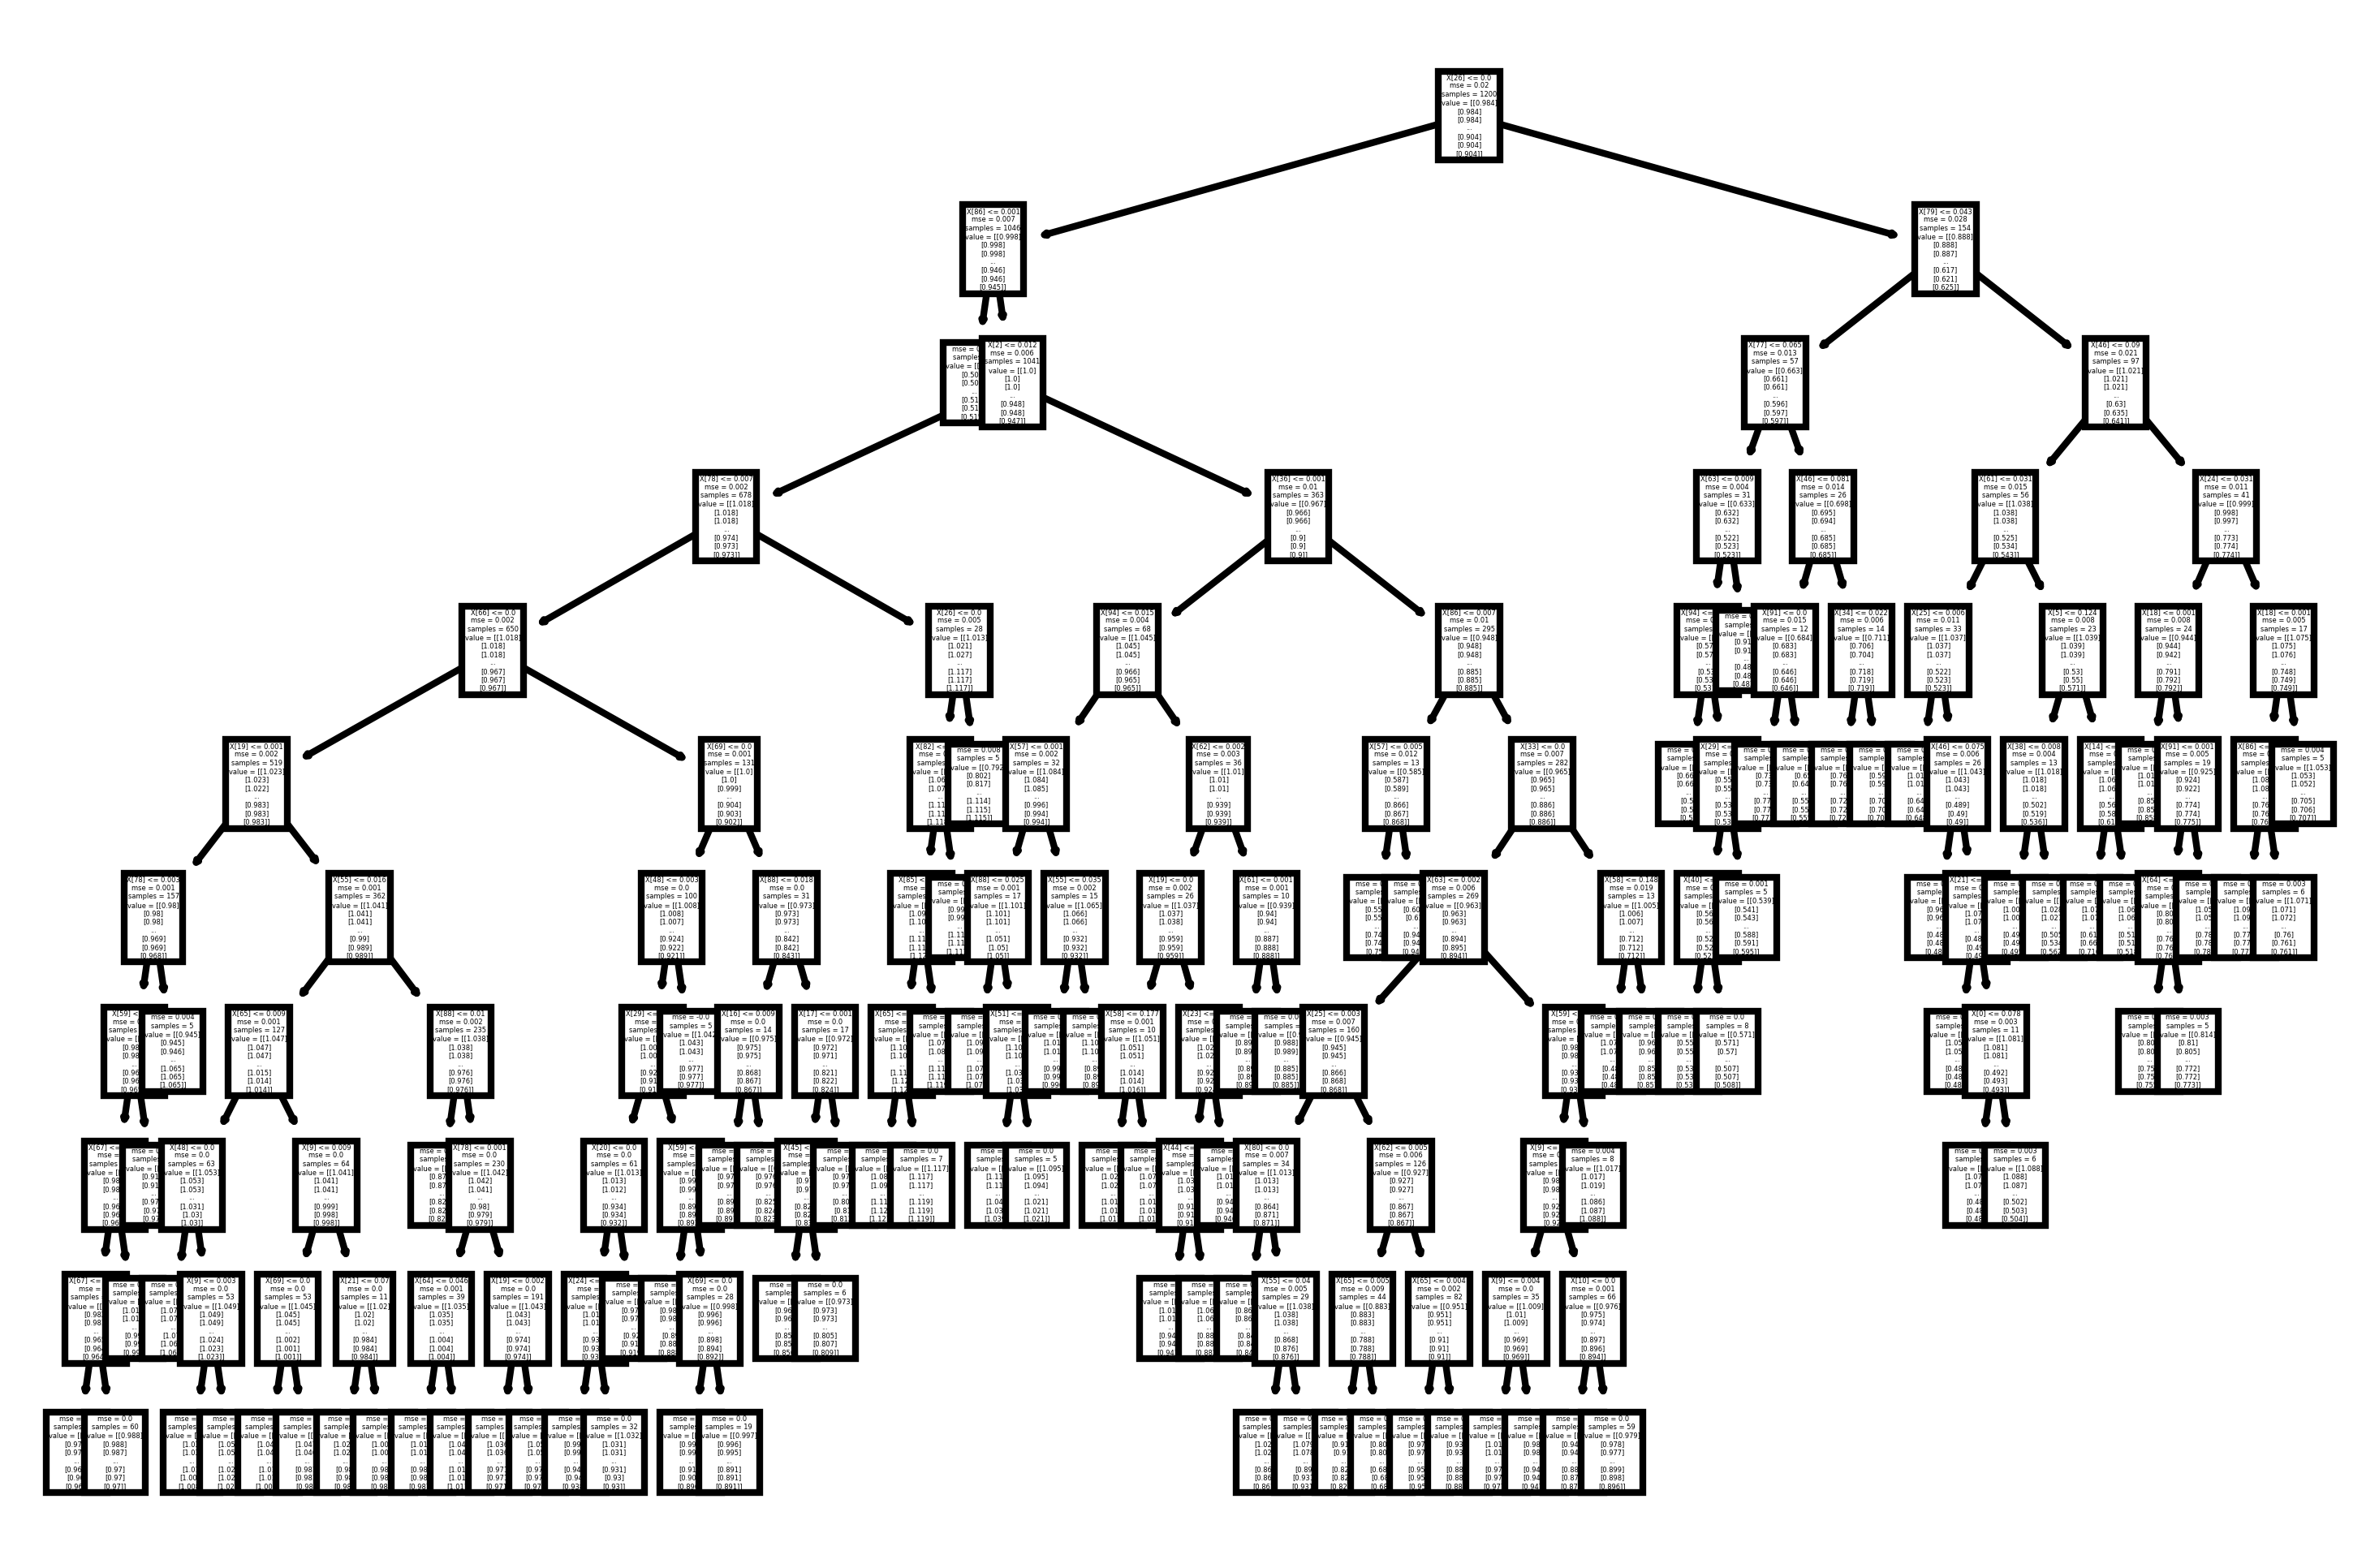

In [12]:
tree=DecisionTreeRegressor(min_samples_leaf=5,max_depth=10)

treeModel=tree.fit(x_train, y_train)

y_pred=treeModel.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print(f"model mse is {mse :3.2}")
print("Maximum Depth of the the tree is ", treeModel.tree_.max_depth)
print("Number of nodes of the tree is ",treeModel.tree_.node_count)
print("Number of leaves (AKA number of regions) is ", treeModel.tree_.n_leaves)
fig=plt.figure(dpi=600)
sub=fig.add_subplot(1,1,1)
plot_tree(treeModel)
plt.show()

#### decision tree : hyper params (maxdepth = 10,  minsamples = 3) ....reducing max depth below 5 increases mse

model mse is 0.0036
Maximum Depth of the the tree is  10
Number of nodes of the tree is  239
Number of leaves (AKA number of regions) is  120


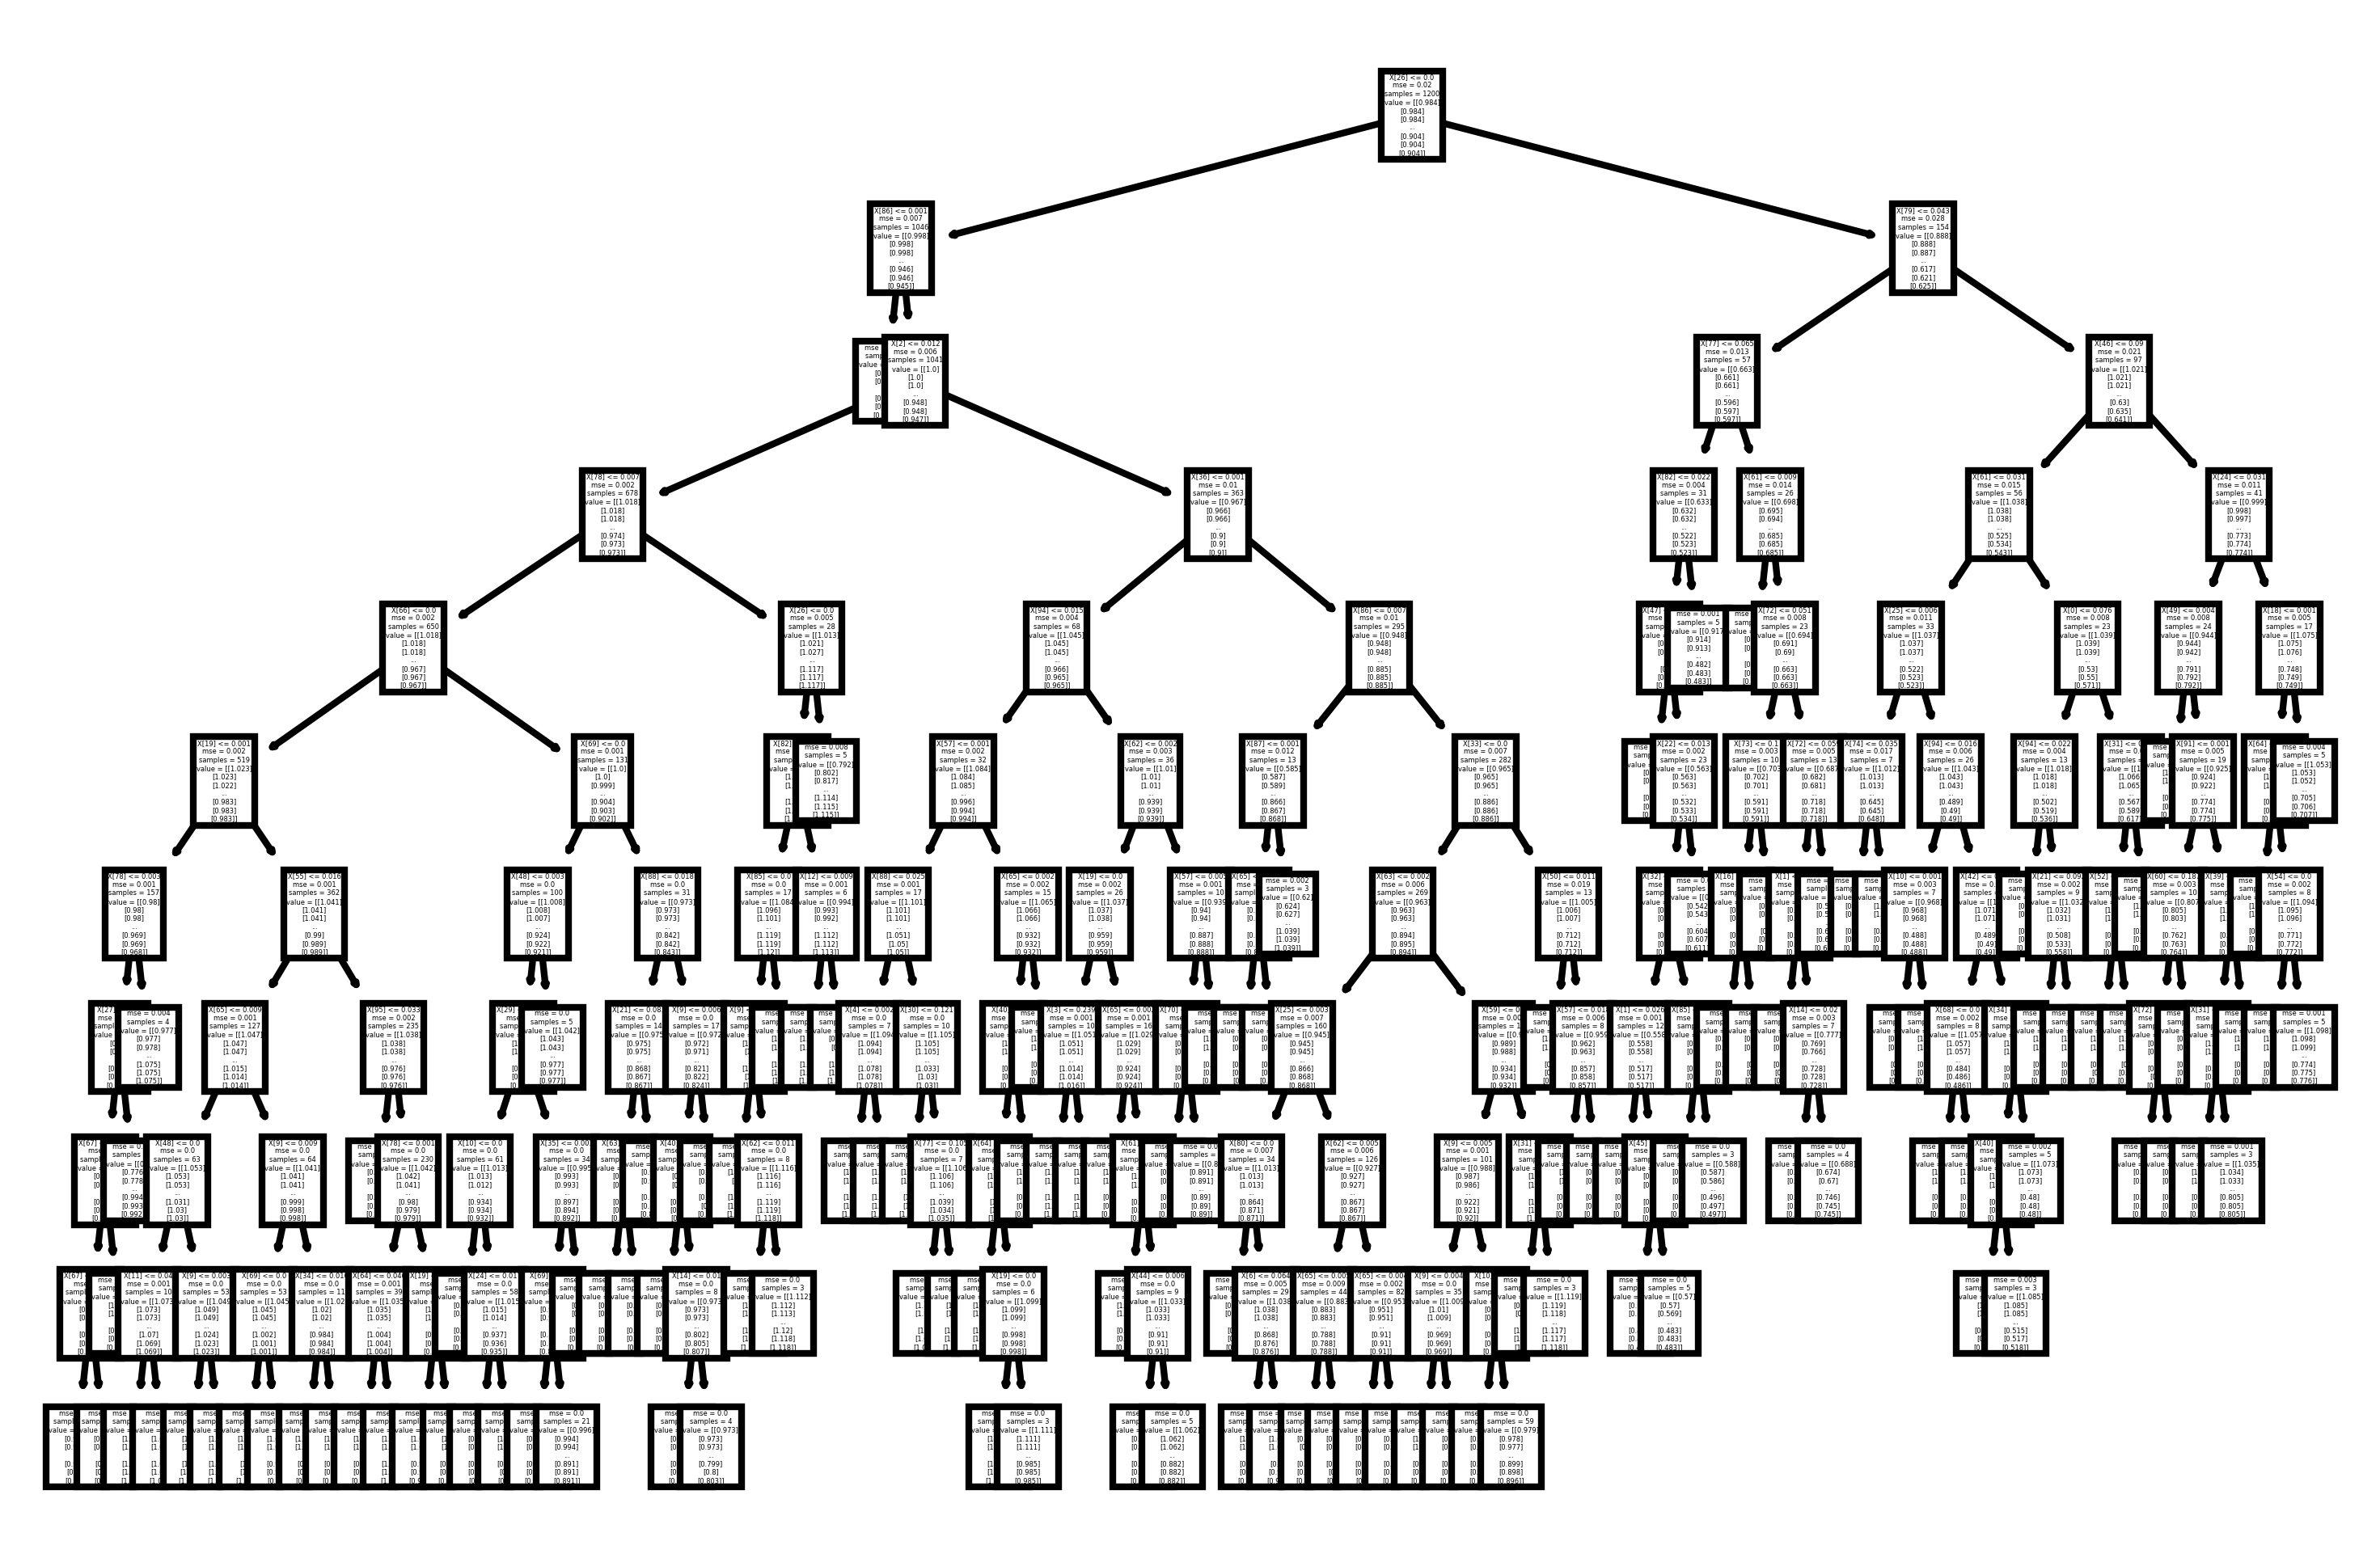

In [13]:
tree=DecisionTreeRegressor(min_samples_leaf=3,max_depth=10)

treeModel=tree.fit(x_train, y_train)

y_pred=treeModel.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print(f"model mse is {mse :3.2}")
print("Maximum Depth of the the tree is ", treeModel.tree_.max_depth)
print("Number of nodes of the tree is ",treeModel.tree_.node_count)
print("Number of leaves (AKA number of regions) is ", treeModel.tree_.n_leaves)
fig=plt.figure(dpi=600)
sub=fig.add_subplot(1,1,1)
plot_tree(treeModel)
plt.show()

model mse is 0.0035
Maximum Depth of the the tree is  15
Number of nodes of the tree is  437
Number of leaves (AKA number of regions) is  219


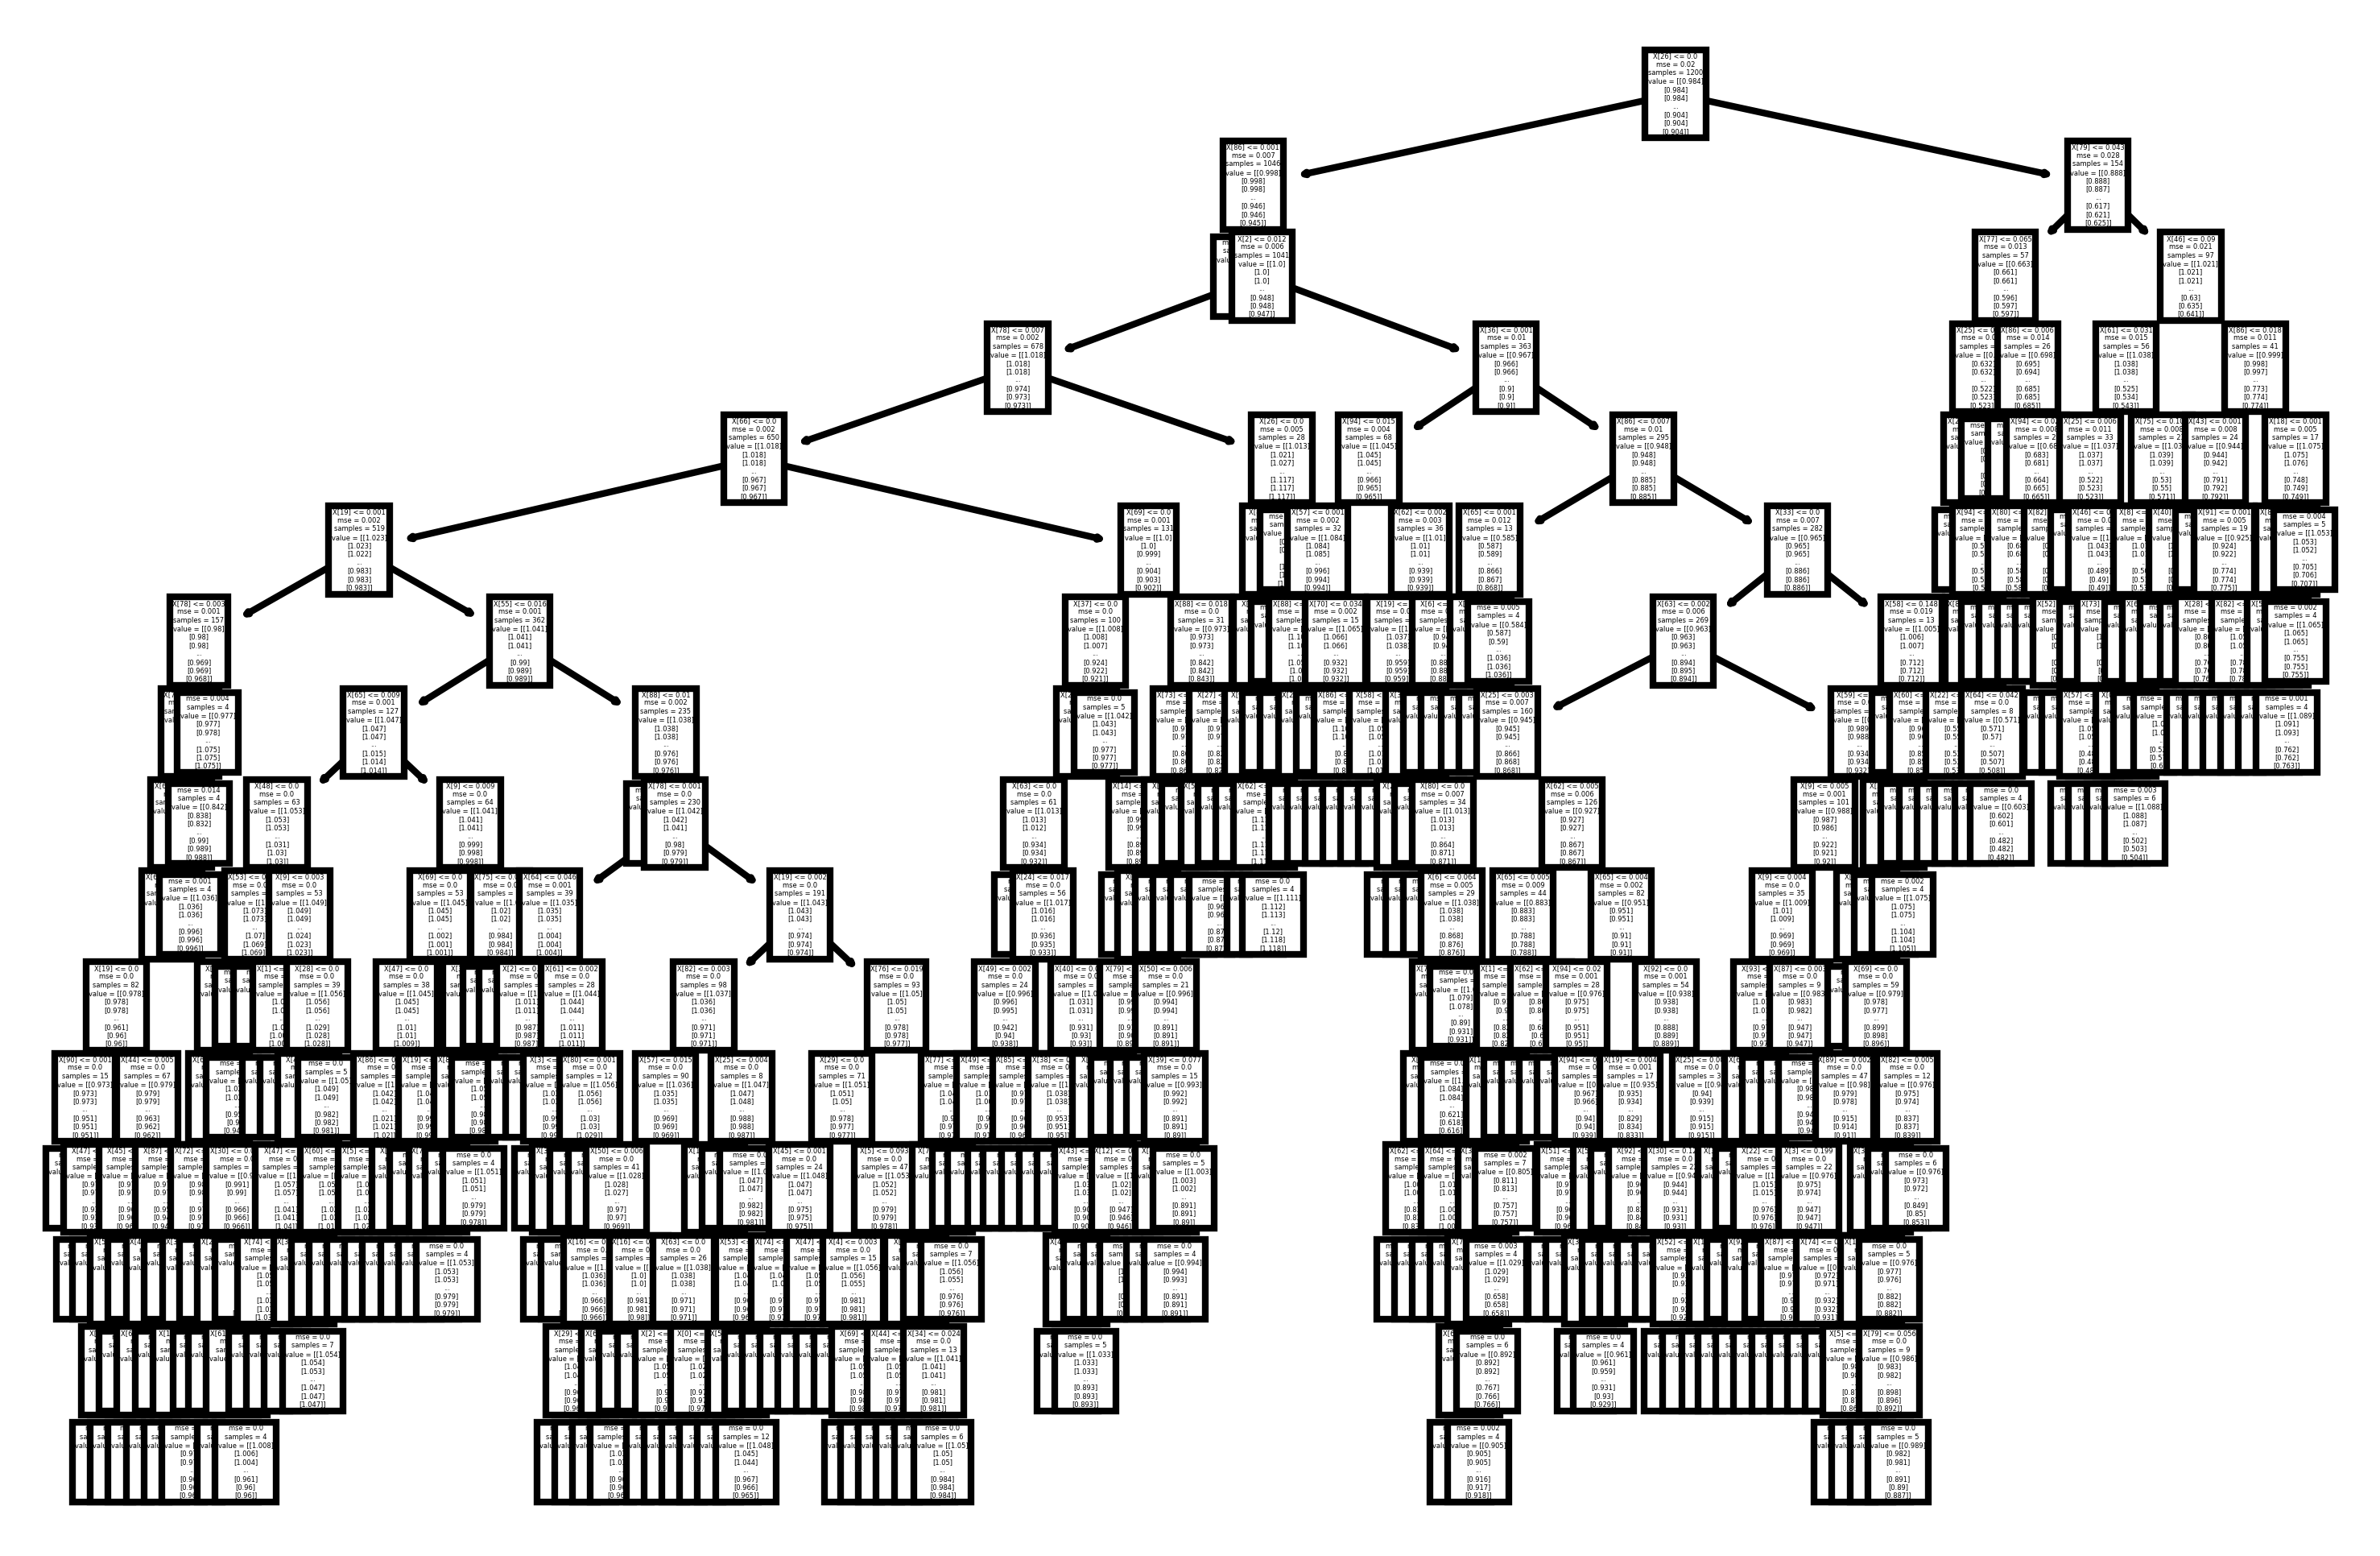

In [14]:
tree=DecisionTreeRegressor(min_samples_leaf=4,max_depth=15)

treeModel=tree.fit(x_train, y_train)

y_pred=treeModel.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print(f"model mse is {mse :3.2}")
print("Maximum Depth of the the tree is ", treeModel.tree_.max_depth)
print("Number of nodes of the tree is ",treeModel.tree_.node_count)
print("Number of leaves (AKA number of regions) is ", treeModel.tree_.n_leaves)
fig=plt.figure(dpi=600)
sub=fig.add_subplot(1,1,1)
plot_tree(treeModel)
plt.show()

#### increasing max depth does not help mse now

model mse is 0.0034
Maximum Depth of the the tree is  17
Number of nodes of the tree is  463
Number of leaves (AKA number of regions) is  232


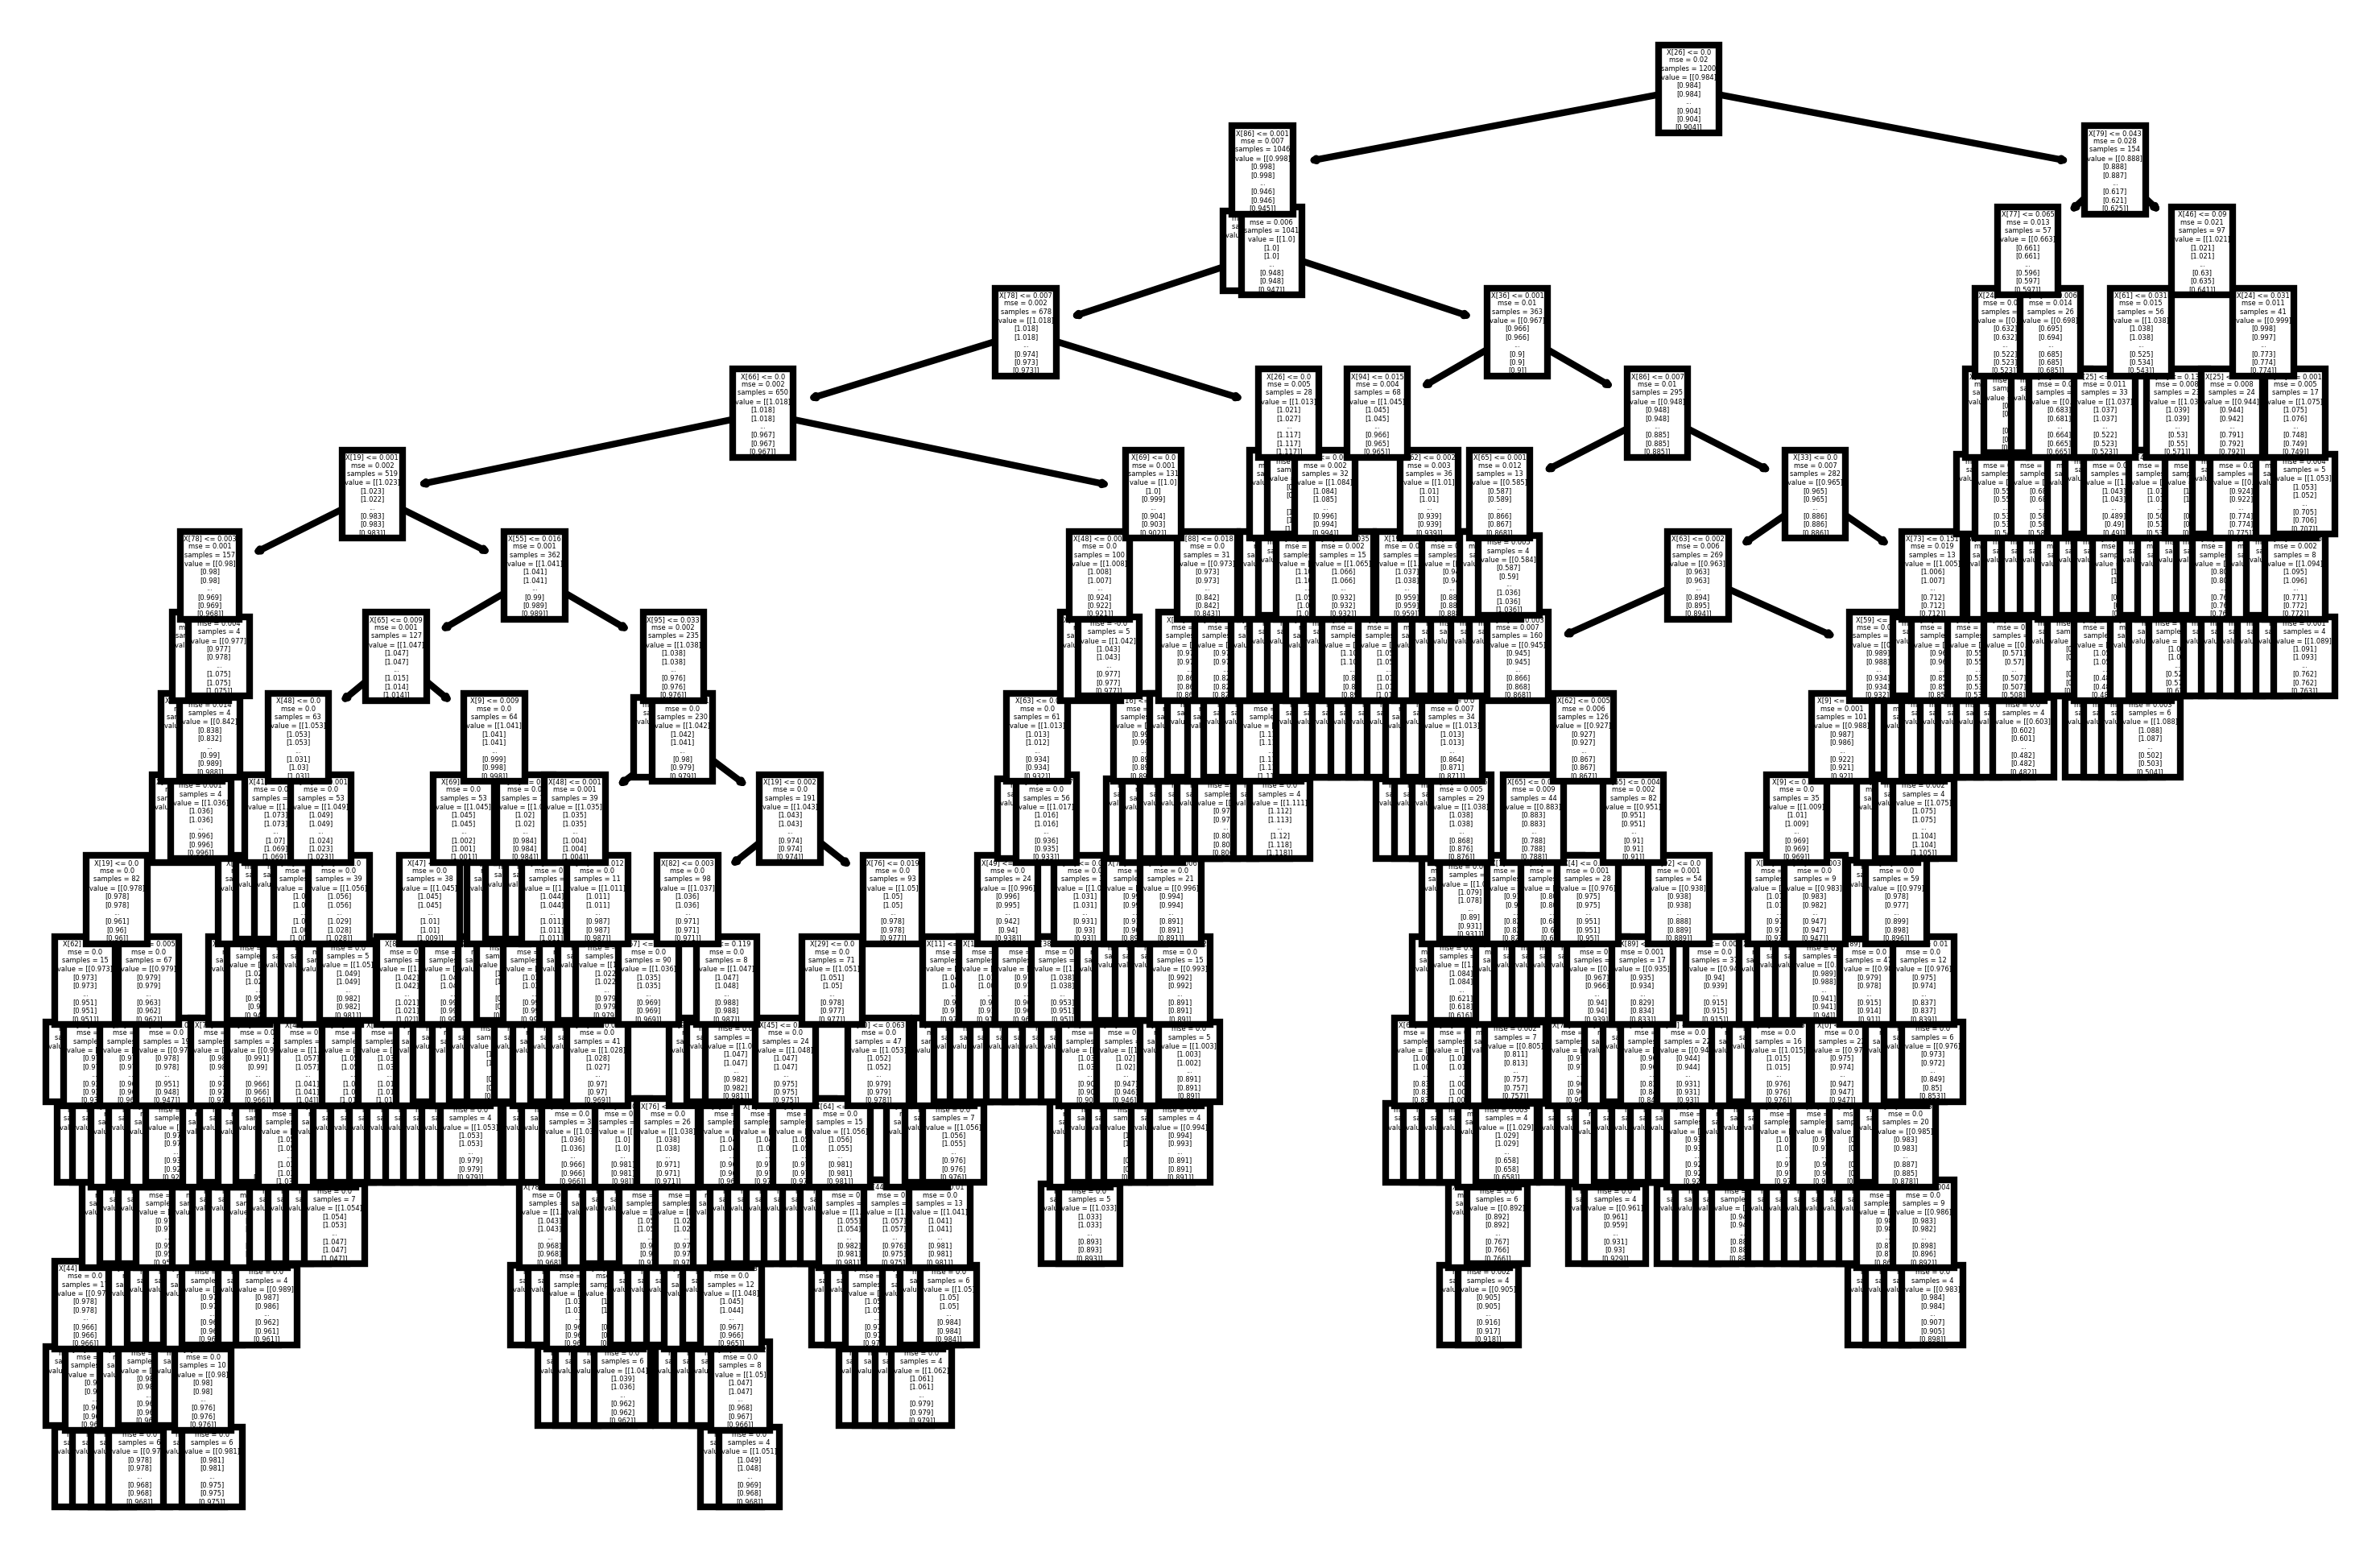

In [15]:
tree=DecisionTreeRegressor(min_samples_leaf=4,max_depth=20)

treeModel=tree.fit(x_train, y_train)

y_pred=treeModel.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print(f"model mse is {mse :3.2}")
print("Maximum Depth of the the tree is ", treeModel.tree_.max_depth)
print("Number of nodes of the tree is ",treeModel.tree_.node_count)
print("Number of leaves (AKA number of regions) is ", treeModel.tree_.n_leaves)
fig=plt.figure(dpi=600)
sub=fig.add_subplot(1,1,1)
plot_tree(treeModel)
plt.show()

In [24]:
tree=DecisionTreeRegressor(min_samples_leaf=4,max_depth=12)

treeModel=tree.fit(x_train, y_train)

y_pred=treeModel.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print(f"model mse is {mse :3.2}")
print("Maximum Depth of the the tree is ", treeModel.tree_.max_depth)
print("Number of nodes of the tree is ",treeModel.tree_.node_count)
print("Number of leaves (AKA number of regions) is ", treeModel.tree_.n_leaves)

model mse is 0.0034
Maximum Depth of the the tree is  12
Number of nodes of the tree is  301
Number of leaves (AKA number of regions) is  151


In [17]:
'''
tree=DecisionTreeRegressor(min_samples_leaf=4,max_depth=13)

treeModel=tree.fit(x_train, y_train)

y_pred=treeModel.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print(f"model mse is {mse :3.2}")
print("Maximum Depth of the the tree is ", treeModel.tree_.max_depth)
print("Number of nodes of the tree is ",treeModel.tree_.node_count)
print("Number of leaves (AKA number of regions) is ", treeModel.tree_.n_leaves)
'''

model mse is 0.0035
Maximum Depth of the the tree is  13
Number of nodes of the tree is  361
Number of leaves (AKA number of regions) is  181


#### BEST TREE MODEL PARAMS ARE min_samples_leaf = 4, max_depth=12

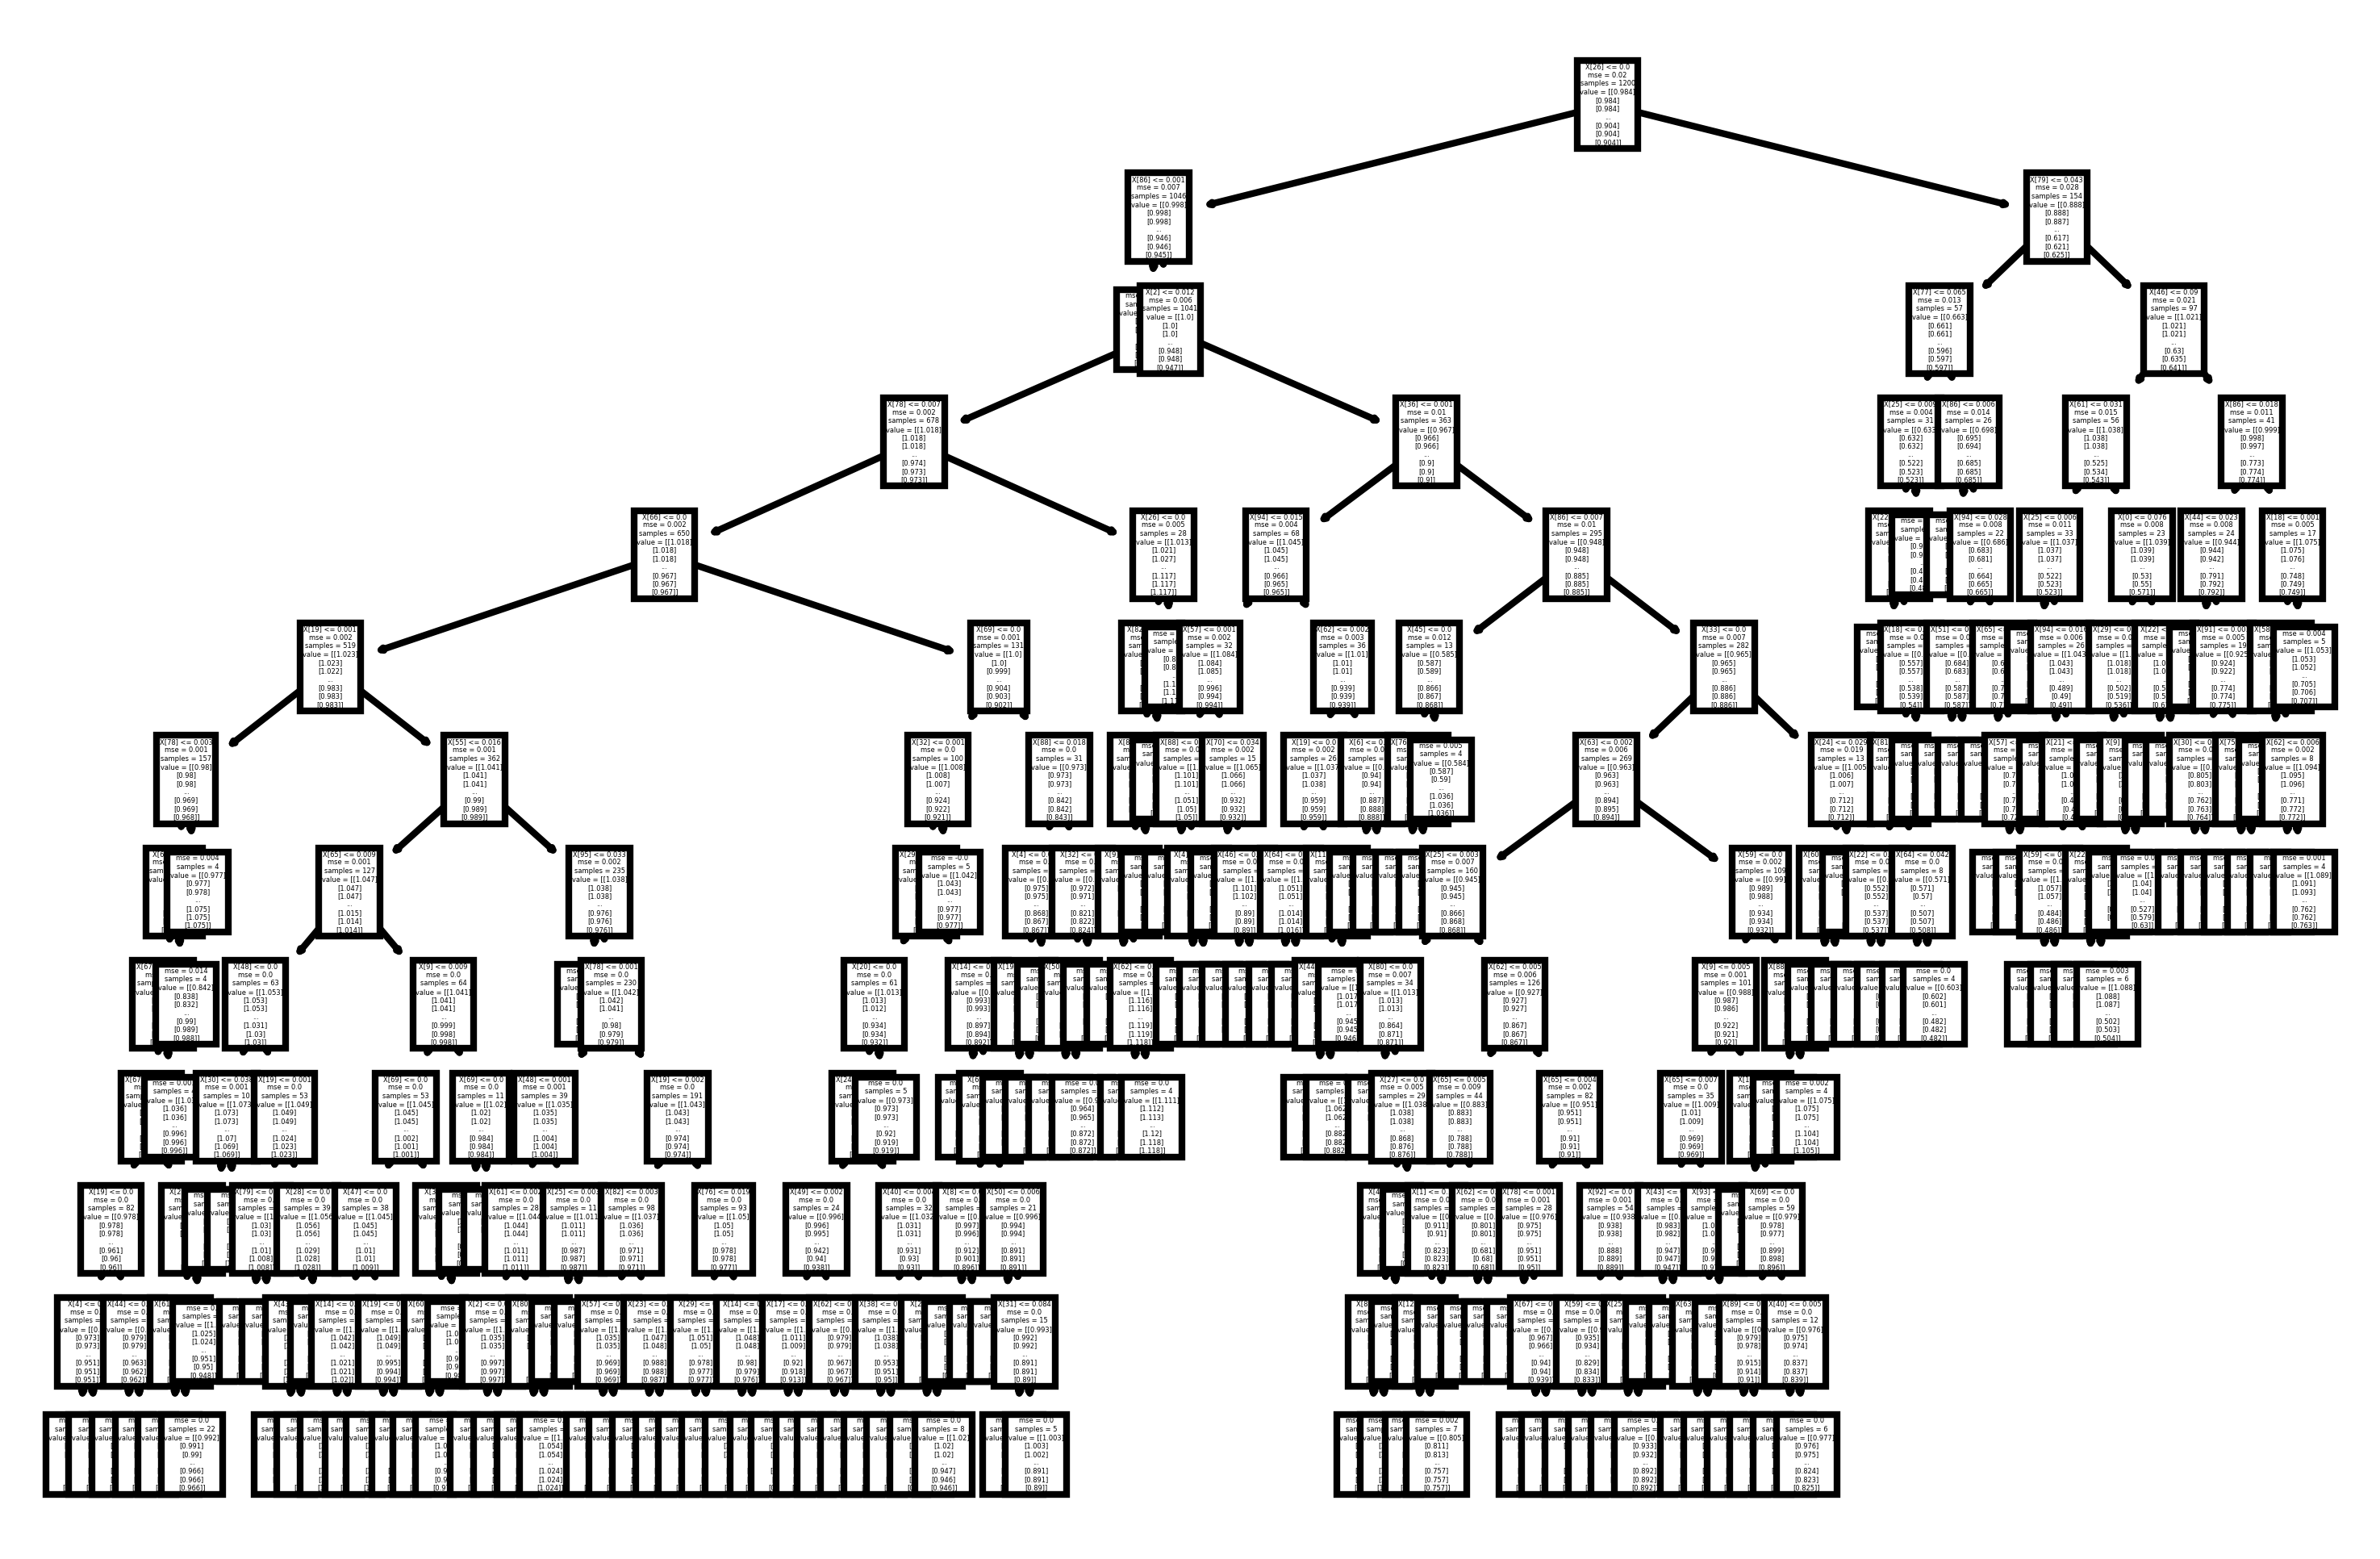

In [25]:
fig=plt.figure(dpi=600)
sub=fig.add_subplot(1,1,1)
plot_tree(treeModel)
plt.show()

#### Plotting images with best model 

In [19]:
print("<storing color img data for comparison>")
colorimg_train, colorimg_test = train_test_split(data_rgb, test_size= 0.20, random_state = 0)

<storing color img data for comparison>


In [26]:
treeModel.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#### Plotting with best model

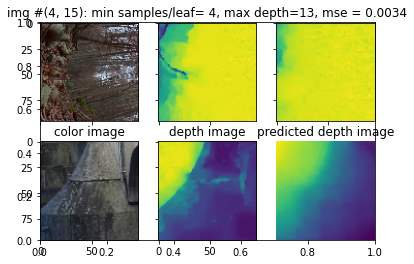

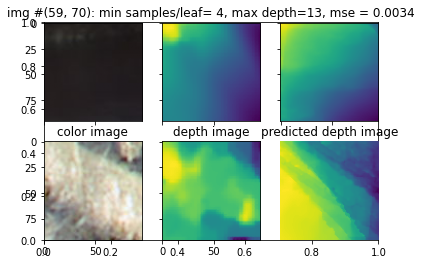

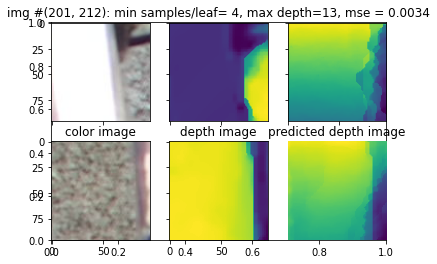

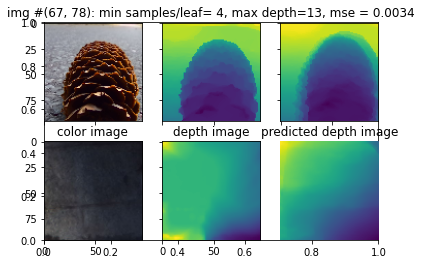

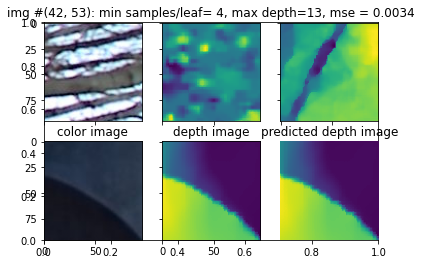

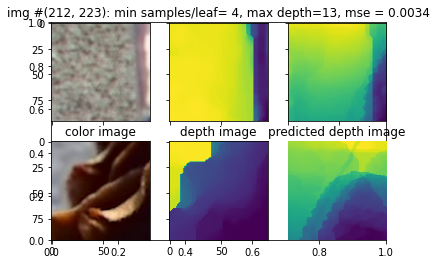

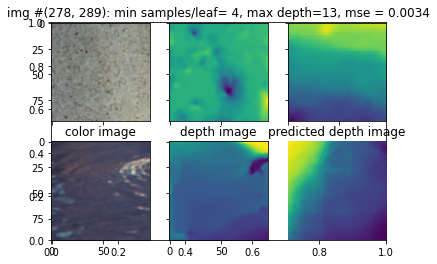

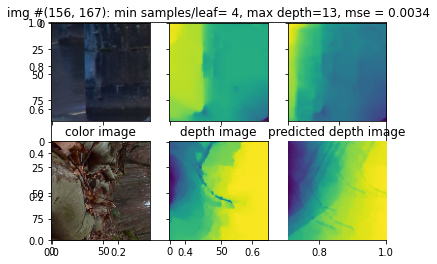

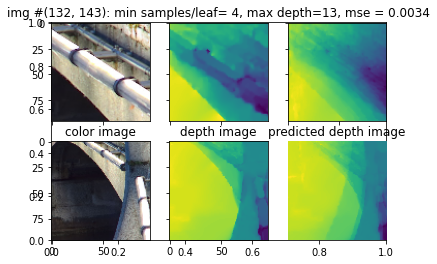

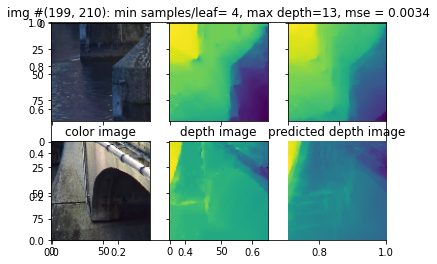

In [31]:
images = [4,59,201,67,42, 212, 278, 156, 132, 199]
for k in images:
    f = plt.figure()
    plt.title(f"img #{k,k+11}: min samples/leaf= 4, max depth=13, mse = {mse :3.2}")
    axarr = f.subplots(2,3)
    plt.axis("off")
    axarr[0,0].imshow(colorimg_test[k])
    axarr[0,1].imshow(y_test[k].reshape(96,96,1))
    axarr[0,2].imshow(y_pred[k].reshape(96,96,1))
    axarr[1,0].imshow(colorimg_test[k+11])
    axarr[1,1].imshow(y_test[k+11].reshape(96,96,1))
    axarr[1,2].imshow(y_pred[k+11].reshape(96,96,1))
    axarr[1,0].set_title('color image')
    axarr[1,1].set_title('depth image')
    axarr[1,2].set_title('predicted depth image')
    for ax in axarr.flat:
        ax.label_outer()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 15.0)

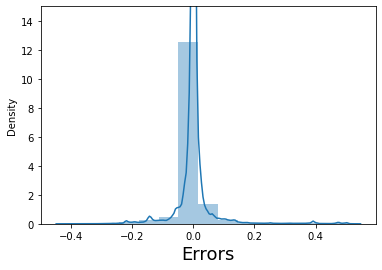

In [32]:
# residuals 
res = y_pred - y_test
fig = plt.figure()
sns.distplot(res, bins = 15)                
plt.xlabel('Errors', fontsize = 18) 
plt.ylim(0,15)

<class 'numpy.ndarray'>
residuals shape (300, 9216)

 Residuals summary 
 count    9216.000000
mean       -0.016831
std         0.010587
min        -0.035683
25%        -0.024594
50%        -0.018827
75%        -0.011297
max         0.013774
dtype: float64


Text(0, 0.5, 'predicted depth')

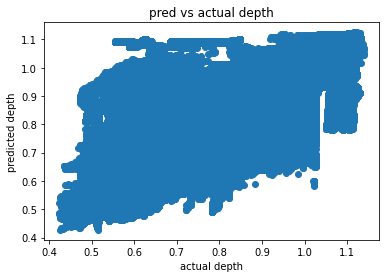

In [34]:
# plot res vs coefs 
print(type(res)) 
print("residuals shape",res.shape)
resi = pd.Series(res[0])

print("\n Residuals summary \n",resi.describe())

fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.title("pred vs actual depth")
plt.xlabel("actual depth")
plt.ylabel("predicted depth")